# Pymaceuticals Inc.
---

### Analysis

- Using the Bar Graph was saw that Capomulin and Ramicane were the most poopular Drug Regimens
-  The pie chart showed us that the distribution between male an female was fairly close (51% to 49%)  This gives us confidence that in this study we are not getting biased results based on gender
-  The box plots showed us that Capomulin and Ramicane were most commonlly efective at having smaller tumor volumes by the end of treatment
- The correlation between average tumor volume and mouse weight was a 0.84.  This means there is a stong corelation between the two.  
 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge( mouse_metadata, study_results, on = "Mouse ID")


# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count=df['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_dup

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Optional: Get all the data for the duplicate mouse ID. 
mice_dup_data = df.loc[df["Mouse ID"] == 'g989',:]
mice_dup_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'].isin(mice_dup)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_clean = clean_df['Mouse ID'].nunique()
mouse_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
Median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std_dev = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
SEM = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
# Assemble the resulting series into a single summary DataFrame.
drug_df = pd.DataFrame({'Mean Tumor Volume': Mean,
                      'Median Tumor Volume': Median,
                       'Tumor Volume Variance': variance,
                       'Tumor Volume Standard Deviation': std_dev,
                       'Tumor Volume SEM': SEM})
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

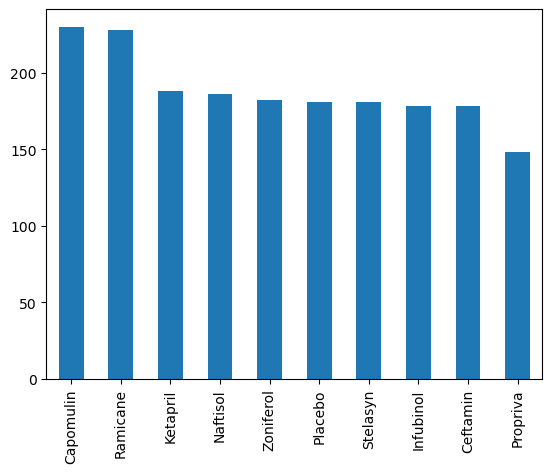

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_mouse_counts = clean_df['Drug Regimen'].value_counts()

pandas_bar= drug_mouse_counts.plot.bar(x="Name of Drug", y="Count of Mice")



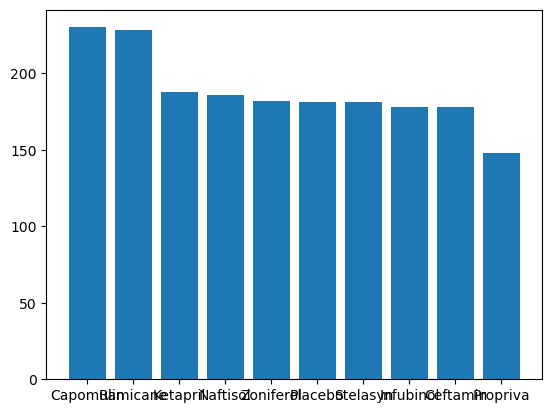

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x= drug_mouse_counts.index.values
y = drug_mouse_counts.values
pyplotbar = plt.bar(x,y)

plt.show()

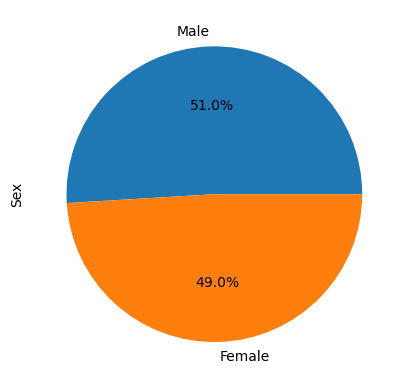

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_df['Sex'].value_counts()
pandas_pie = gender_counts.plot.pie(autopct= "%1.1f%%")

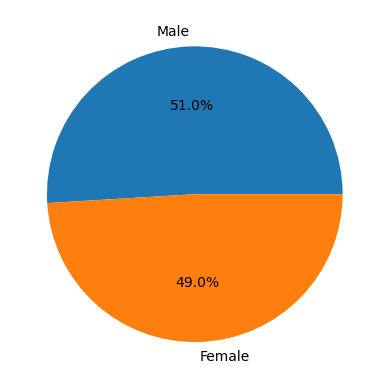

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels= gender_counts.index.values
gender_values = gender_counts.values
plt.pie(gender_values, labels=gender_labels, autopct= "%1.1f%%" )
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_drugs= clean_df[clean_df['Drug Regimen'].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse

last = filtered_drugs.groupby('Mouse ID').max()['Timepoint']
last_df = pd.DataFrame(last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Meging Individually
merge_df=pd.merge(last_df, clean_df,
                       how="left", on= ('Mouse ID', 'Timepoint'))

merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
# drug_list already created


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    tumor = merge_df.loc[merge_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    tumor_vol.append(tumor)
    

    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of Tumor Volume for {drug} is: {lowerq}")
    print(f"The upper quartile of Tumor Volume for {drug} is: {upperq}")
    print(f"The interquartile range of Tumor Volume for {drug} is: {iqr}")
    print(f"The the median of Tumor Volume for {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers for {drug}.")
    print(f"Values above {upper_bound} could be outliers for {drug}.")
    print(f'------------------------------------------')
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    
    # add subset 

    
    # Determine outliers using upper and lower bounds


The lower quartile of Tumor Volume for Capomulin is: 32.37735684
The upper quartile of Tumor Volume for Capomulin is: 40.1592203
The interquartile range of Tumor Volume for Capomulin is: 7.781863460000004
The the median of Tumor Volume for Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
------------------------------------------
The lower quartile of Tumor Volume for Ramicane is: 31.56046955
The upper quartile of Tumor Volume for Ramicane is: 40.65900627
The interquartile range of Tumor Volume for Ramicane is: 9.098536719999998
The the median of Tumor Volume for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
------------------------------------------
The lower quartile of Tumor Volume for Infubinol is: 54.04860769
The upper quartile of Tumor Volume for Infubinol is: 65.52574285
The interqu

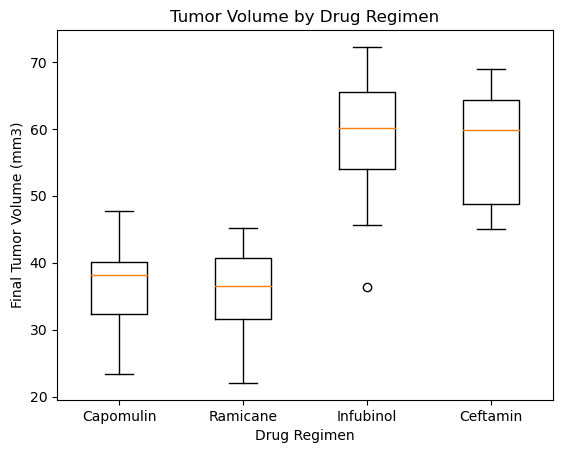

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol, labels=drug_list)
plt.show()

## Line and Scatter Plots

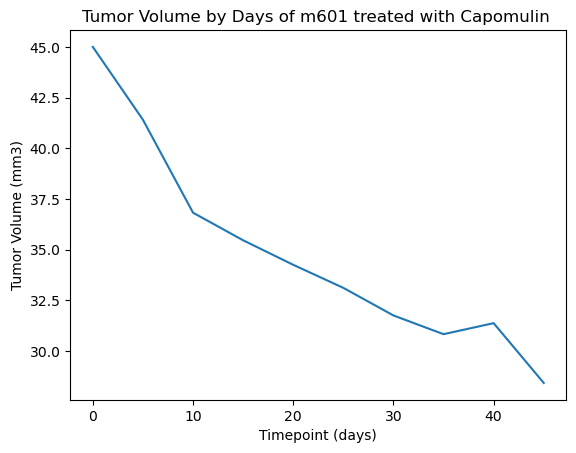

In [46]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_df = clean_df.loc[clean_df['Mouse ID']=="m601"]
y_axis = mouse_df['Tumor Volume (mm3)']
x_axis = mouse_df['Timepoint']
plt.plot(x_axis, y_axis)
plt.title('Tumor Volume by Days of m601 treated with Capomulin ')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

C:\Users\stmar\AppData\Local\Temp\ipykernel_21448\1273160677.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tum_vol = Capomulin_df.groupby(['Mouse ID']).mean()


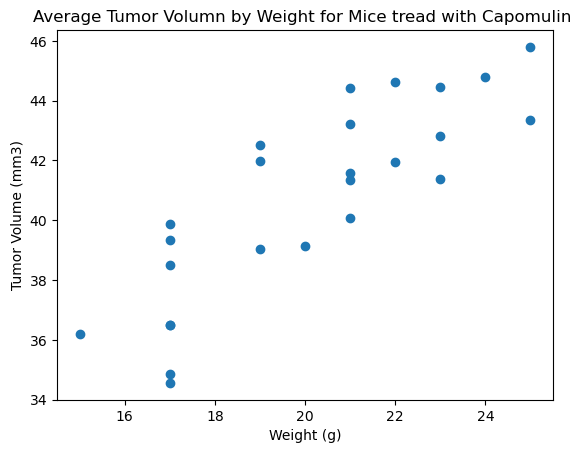

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df= clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
mean_tum_vol = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(mean_tum_vol['Weight (g)'],mean_tum_vol['Tumor Volume (mm3)'])
plt.title('Average Tumor Volumn by Weight for Mice tread with Capomulin ')
plt.xlabel('Weight (g)')
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [52]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mean_tum_vol['Weight (g)'],mean_tum_vol['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.84


y = 0.95x + 21.55


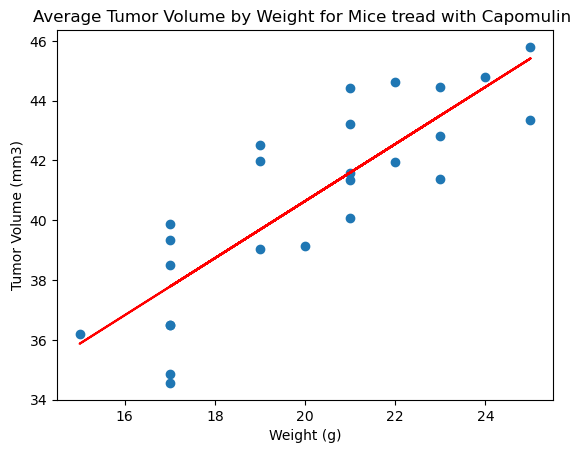

In [56]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(mean_tum_vol['Weight (g)'],mean_tum_vol['Tumor Volume (mm3)'])
regress_values = mean_tum_vol['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mean_tum_vol['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.scatter(mean_tum_vol['Weight (g)'],mean_tum_vol['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume by Weight for Mice tread with Capomulin ')
plt.xlabel('Weight (g)')
plt.ylabel("Tumor Volume (mm3)")
print(line_eq)
plt.show()